---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup <br>
     Laura Dietl
    </span>
    <span style="float: right;">
       Machine Learning 1<br>
        <span style="float: right;">WS 24/25</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 4</span><br>
     Themen: Imputing, Neuronale Netze in PyTorch, Backpropagation<br>
     Abgabetermin: 29.11.2024, 23:59 Uhr <br>
     Punkte: 31
</p>


---

**Namen:** Elkhan Alimatov (ela0016), Mazen Zidan (maz4669) , Hamdah Mariyam (ham2119)

---

# 1. Imputing - Dealing with Missing Values - Ein Weg mit fehlenden Werten umzugehen

Bei einer Variablen in einem Datensatz kann es durchaus vorkommen, dass für einige Beobachtungen die Werte nicht bekannt sind. Zum Beispiel kann es sein, dass ein Kunde in einem Online-Shop sein Profil nicht vollkommen ausfüllt, so dass die Handynummer, das Alter oder gewisse Interessen nicht bekannt sind. Die Variable Handynummer in diesem Datensatz wäre dann für den jeweiligen Kunden nicht befüllt.

Einige Algorithmen des Maschinellen Lernens können mit diesen fehlenden Werten nicht umgehen. Damit man einen Algorithmus trotzdem auf einen Datensatz mit einer Variable mit fehlenden Werten anwenden kann, gibt es einige einfache Strategien.

**Ignoriere die fehlenden Werte (Omission)**

Die einfachste und radikalste Methode ist die fehlenden Werte für das Training zu entfernen. Dies kann man auf zwei Arten machen:
1. Entfernen der Variable aus dem Trainingsdatensatz. Z.B. im obigen Beispiel die Variable Handynummer nicht als Input-Variable zu nehmen.
1. Entfernen aller Zeilen im Datensatz, die einen fehlenden Wert in einer zu berücksichtigen Variable aufweisen. Z.B. im obigen Beispiel alle Kunden ohne Handynummer aus dem Tainingsdatensatz ausschließen.

**Imputing**

Anstatt die fehlenden Werte zu entfernen, kann man auch versuchen, diese mit "geeigneten" Werten aufzufüllen. Dafür gibt es mehrere einfache Methoden.
1. _Constant Value Imputing_ Wenn der Kontext es hergibt, können alle fehlenden Werte einer Variablen mit einem Standardwert aufgefüllt werden. 
    1. Bei einer kategoriellen Variable können z.B. die fehlenden Werte mit 'unknown' oder 'other' ersetzt werden. Wenn z.B. bei einem Kunden der Wert der Variable "Intresse an Sportartikeln" fehlt, kann dieser die neue Ausprägung "unknown" erhalten.
    1. Wenn bei einer numerischen Variablen nur positive Werte auftreten können, wie z.B. bei der Variable "Anzahl an Käufe", kann der fehlende Wert sinnvollerweise mit 0 ersetzt werden.
1. _Mean/Median/Mode Imputing_ Die fehlenden Werte einer Variablen werden durch deren arithmetisches Mittel, den Median oder den Modus ersetzt. Diese repräsentiern "typische" Werte für die Variable.
    1. Bei kategoriellen Variablen werden die fehlenden Werte durch die am häufigsten auftretende Ausprägung ersetzt (den Modus).
    1. Bei numerischen Variablen werden die fehlenden Werte mit dem arithmetischen Mittel oder dem Median der anderen Ausprägungen der Variable ersetzt.

Dies sind nur die einfachen und univariaten Methoden des Imputing. Weitere multivariate Imputing-Verfahren wie die Benutzung von Vorhersagemodellen werden in der Vorlesung besprochen.

## Aufgabe 1.1 (Vor- & Nachteile der Imputing-Verfahren) [6 Punkte]
Betrachten Sie die oben genannten Omission und Imputing-Verfahren. Welche Vor- und Nachteile könnten diese Verfahren jeweils haben?

**Antwort zu Aufgabe 1.1**

+ Constant Value Imputing

   + Vorteile: Standardwerte wie unknown oder 0 sind leicht zu implementieren.
             Die Anzahl der Beobachtungen bleibt gleich.
             Man kann das Ganze anpassen, je nachdem, was gerade gebraucht wird.

   + Nachteile: Es kann zu Verzerrungen kommen: Eingefügte Standardwerte können die Daten verfälschen.
              Wenn man einen Standardwert oft benutzt, kann das Ergebnis ungenauer werden.


+ Mean/Median/Mode Imputing

   + Vorteile: Arithmetisches Mittel, Median und Modus repräsentieren oft gut den Gesamtdatensatz.
             Die Methode ist flexibel, weil es anwendbar auf numerische und kategorische Variablen ist.
             Die Berechnung ist einfach.

   + Nachteile: Ersetzte Werte können die Realität nicht immer korrekt widerspiegeln.
              Mean Imputation kann bei nicht normal verteilten Daten zu unrealistischen Werten führen.
              Alle eingefügten Werte sind gleich, was die Streuung der Daten verfälschen kann.


# 2. Neuronale Netze mit PyTorch

### Daten

Der Datensatz `gt.csv` (zu finden auf der Moodle-Seite des Praktikums (https://moodle.thi.de/course/view.php?id=6824)) ist eine etwas abgewandelte und bearbeitete Version des Datensatzes aus dem UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set). 

Der Datensatz enthält 36733 Messpunkte von je 11 Sensoren einer Gasturbine im Nordwesten der Türkei. Die einzelnen Werte sind dabei jeweils Aggregate (Summe oder Mittelwert) über eine Stunde. Die Sensordaten diesen dazu die Gasemissionender Turbine, insb. CO und NOx (NO & NO2), zu messen.

#### Initialisierung der Daten
Hier finden Sie bereits geschriebenen Code, der die Daten einliest und in Trainings- und Testdaten splittet. __Bitte verändern Sie diesen Code nicht__, sondern fügen Ihren Code unterhalb ein.

In [123]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [124]:
# Load data
file_path = "Daten Blatt 4/gt.csv"
data = pd.read_csv(file_path)
data


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,NaN,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,NaN,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [125]:
# Define target and feature
y = data.NOX
X = data.drop(columns=["CO", "NOX"])

In [126]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Aufgabe 2.1 (Datenaufbereitung) [4 Punkte]

Untersuchen Sie den Datensatz der Sensordaten einer Gasturbine `gt.csv`.

1. Welche Variablen weisen fehlende Werte auf?
1. Ersetzen Sie diese mittels eines sinnvollen oben genannten Imputing-Verfahrens. _Hinweis_: Sie können dafür die Funktion `SimpleImputer()` aus dem `sklearn` Paket verwenden. Informieren Sie sich vorher über deren Funktionsweise und Optionen.
1. Was für ein Vorverarbeitungsschritt scheint noch sinnvoll zu sein? Führen Sie diesen ggf. auch durch.

_Achtung_: Behalten Sie bei Ihren Datenoperationen die gegebene Aufteilung in Training- und Testdaten bei.

### Lösung Aufgabe 2.1

1. Die variablen CDP und TAT haben fehlende werte

In [127]:
missing_values = data.isnull().sum()

print("Missing Values: ", missing_values)

Missing Values:  AT         0
AP         0
AH         0
AFDP       0
GTEP       0
TIT        0
TAT     6605
TEY        0
CDP     4426
CO         0
NOX        0
dtype: int64


In [128]:
# Teil 2
from sklearn.impute import SimpleImputer

# Create imputers for missing values
mean_imputer = SimpleImputer(strategy='mean')

# Apply imputation for the missing columns (TAT and CDP)
data['TAT'] = mean_imputer.fit_transform(data[['TAT']])
data['CDP'] = mean_imputer.fit_transform(data[['CDP']])

# Verify if missing values are filled
mv_after_imput = data.isnull().sum()

mv_after_imput

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

Die daten können auch skaliert werden

In [129]:
# Teil 3
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Display the first few rows of the standardized dataset to verify
standardized_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.591406,0.074502,1.743825e-15,-0.904182,1.426499
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.000000,0.074502,-1.625139e-01,-0.850611,1.462891
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.649445,0.102033,-1.526101e-02,-0.849020,1.582687
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.646221,0.097551,-6.630868e-02,-0.946415,1.473852
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.618814,0.074502,-1.448436e-01,-0.930328,1.433006


## Aufgabe 2.2 (Training in PyTorch) [12 Punkte]
Erstellen Sie ein Feedforward Neuronales Netz auf dem in der vorherigen Aufgabe 2.1 aufbereiteten Datensatz mittels PyTorch, welches basierend auf den anderen Sensordaten die NOx-Emission vorhersagen kann. Benutzen Sie dabei den L2-Loss als Kostenfunktion. Welchen RMSE erzielt Ihr trainiertes Neuronales Netz, wenn Sie dies auf die Testdaten (`X_test, y_test`) anwenden?

In dieser Aufgabe gibt es keinerlei weitere Vorgabe an das zu implementierende Modell. Sie sind in der Struktur des Netzes und dem Vorgehen frei. Um aber die volle Punkzahl zu erhalten, müssen Sie ein sinnvolles Netz trainieren, d.h. die Optimierung mittels Gradient Descent konvergiert, kein Overfitting etc.. Versuchen Sie auch den RMSE so klein wie möglich zu bekommen.

_Hinweis_: Anstatt Ihre aufbereiteten Daten zu nehmen, können Sie auch schon vorverarbeitete Daten einlesen durch den Befehl `data = torch.load("Daten Blatt 4/gt_prepared")`
Dieser liest ein Dictionary ein, in welchem Sie Tensoren der Trainings- und Testdaten finden. Der Befehl `data.keys()` zeigt Ihnen die Key-Namen. 

### Lösung der Aufgabe 2.2

In [130]:
# Load packages
import torch
from torch import nn
import torch.nn as net
import torch.nn.functional as F
import torch.optim as optim

In [131]:
data = torch.load("Daten Blatt 4/gt_prepared")
print(data.keys())
X_train_prep = data["train_data"]
y_train_prep = data["train_target"].view(-1, 1)
X_test_prep = data["test_data"]
y_test_prep = data["test_target"].view(-1, 1)
print(y_test_prep.shape)



dict_keys(['train_data', 'train_target', 'test_data', 'test_target'])
torch.Size([7347, 1])


In [146]:
# Define Hyper-Parameters
n_iterations = 100


random_seed = 70
torch.manual_seed(random_seed)

In [147]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.ReLU(),    
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [148]:
model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [149]:
train_losses = []
test_losses = []

In [150]:
for epoch in range(1, n_iterations + 1):
    
    # --- Training ----#
    model.train()
    optimizer.zero_grad()                          
    y_pred = model(X_train_prep)                  
    train_loss = F.mse_loss(y_pred, y_train_prep.float())
    train_loss.backward()
    optimizer.step()                                
    
    
    # ----- Evaluation metrics train ---- #
    train_losses.append(np.sqrt(train_loss.item()))
    
    # ----- Test Prediction & Evaluation -------------#
    model.eval()
    y_test_pred = model(X_test_prep)
    
    # Loss
    test_loss = F.mse_loss(y_test_pred, y_test_prep.float())
    test_losses.append(np.sqrt(test_loss.item()))
    
    # Print Validation criteria
    print(f'''Iteration {epoch}, Train set - loss: {round(np.sqrt(train_loss.item()), 3)} | Test set - Loss: {round(np.sqrt(test_loss.item()), 3)}''')

Iteration 1, Train set - loss: 66.091 | Test set - Loss: 65.696
Iteration 2, Train set - loss: 65.759 | Test set - Loss: 65.268
Iteration 3, Train set - loss: 65.33 | Test set - Loss: 64.644
Iteration 4, Train set - loss: 64.704 | Test set - Loss: 63.656
Iteration 5, Train set - loss: 63.711 | Test set - Loss: 61.988
Iteration 6, Train set - loss: 62.036 | Test set - Loss: 59.046
Iteration 7, Train set - loss: 59.078 | Test set - Loss: 53.671
Iteration 8, Train set - loss: 53.674 | Test set - Loss: 43.925
Iteration 9, Train set - loss: 43.869 | Test set - Loss: 29.38
Iteration 10, Train set - loss: 29.233 | Test set - Loss: 20.501
Iteration 11, Train set - loss: 20.381 | Test set - Loss: 17.609
Iteration 12, Train set - loss: 17.532 | Test set - Loss: 15.396
Iteration 13, Train set - loss: 15.329 | Test set - Loss: 13.699
Iteration 14, Train set - loss: 13.64 | Test set - Loss: 12.454
Iteration 15, Train set - loss: 12.402 | Test set - Loss: 11.577
Iteration 16, Train set - loss: 11.53

In [151]:
final_rmse = np.sqrt(test_loss.item())
print(f'Final RMSE on test set: {final_rmse}')

Final RMSE on test set: 7.26734611881089


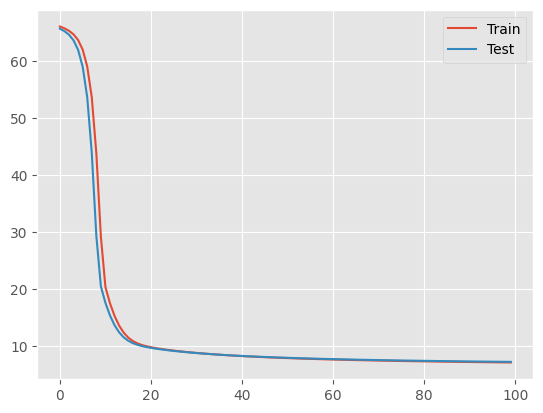

In [152]:
plt.plot(train_losses, label="Train")
plt.plot(test_losses, label="Test")
plt.legend()
plt.show()

# 3. Parameter eines Neuronalen Netzes

## Aufgabe 3.1 [3 Punkte]
Gegeben ist das in PyTorch definierte Neuronale Netze
   
![fc_nn](Bilder/fc_nn.png)

Bestimmen Sie  die Anzahl zu optimierender Parameter.

### Antwort zu Aufgabe 3.1

Optimierungsparameter eines Netzes sind Gewichte und Bias.
Das Netzwerk besteht aus 4 "Layers": Input, 2 Hidden und Output Layers.

1. Hidden Layer besteht aus 8 Neuronen und jede Neuron hat 9 Input Data.
   Gewichte: 9x8 = 72
   Bias: 8
   Anzahl der Parameter: 72 + 8 = 80
2. Hidden Layer besteht aus 6 Neuronen und jede Neuron hat 8 Input Data.
   Gewichte: 8x6 = 48
   Bias: 6
   Anzahl der Parameter: 48 + 6 = 54

3. Output Layer besteht aus einem Neuron und hat 6 Input Data.
   Gewichte: 6x1 = 6
   Bias: 1
   Anzahl der Parameter: 6 + 1 = 7

Anzahl der Parameter des Netzes: 80 + 54 + 7 = 141.
Das neuronale Netzwerk hat insgesamt 141 zu optimierende Parameter.


# 4. Backpropagation

## Aufgabe 4.1 [6 Punkte]
Gegeben ist folgendes Neuronale Netze
   
![fc_nn](Bilder/NN_backpropagation.png)

mit folgenden Gewichtsmatrizen 

$$W^{(1)}=\left(\begin{array}{cc} 
1 & 1\\ 
2 & -2
\end{array}\right)
\quad\text{und}\quad
W^{(2)}=\left(\begin{array}{c} 
1\\ 
-1
\end{array}\right) $$

und Biases

$$b^{(1)}=\left(\begin{array}{c} 
-1\\ 
0
\end{array}\right)
\quad\text{und}\quad
b^{(2)}= -4$$

Die Aktivierungsfunktionen sind folgende:
* Hidden Layer: ReLU
* Output Layer: Identität

Als Verlustfunktion wird der L2-Loss genommen
$$L(y,a)=\frac12(y-a)^2$$

__Aufgabe:__
1. Führen Sie ein Update der Parameter mittels Backpropagation durch für den Datenpunkt
$$x=\left(\begin{array}{c} 
1\\ 
1 
\end{array}\right) $$
mit wahrem Zielwert 
$$ y= -1$$
und der Lernrate $\alpha=0.1$ durch.
1. Wie groß ist der neue Verlust nach dem Parameterupdate? Vergleichen Sie das mit dem Verlust vor durchführung des Updates der Parameter.


# Forward
$$\ z_1^{(1)} = 2 \$$
$$\ z_2^{(1)} = -1 \$$
$$\ a_1^{(1)} = 2 \$$
$$\ a_2^{(1)} = 0 \$$
$$\ z_1^{(2)} = -1 \$$
$$ \hat y = -2 $$
$$\text { loss }=\frac{1}{2}(y-\hat{y})^2=\frac{1}{2}(-1+2)^2=0,5$$
# Ableitungen
$$\begin{aligned}  \frac{d}{d L} L(y, \hat{y}) =-2+1=-1
\end{aligned}$$
$$\frac{d}{d z_0} \hat{y}=1$$
$$\frac{d}{d w_{11}^{(2)}} z^{(2)}=a_1^{(1)}=2$$
$$\frac{d}{d w_{21}^{(2)}} z^{(2)}=a_2^{(1)}=0$$
$$\frac{d}{d b_{1}^{(2)}} z^{(2)}=1$$
$$\frac{d}{d a_{1}^{(1)}} z^{(2)}=w_{22}^{(2)}=1$$
$$\frac{d}{d a_{2}^{(1)}} z^{(2)}=w_{21}^{(2)}=-1$$
$$\frac{d}{d z_{1}^{(1)}} a_1^{(1)}=1$$
$$\frac{d}{d w_{11}^{(1)}} z_1^{(1)}=x_1=1$$
$$\frac{d}{d w_{21}^{(1)}} z_1^{(1)}=x_2=1$$
$$\frac{d}{d b_{2}^{(1)}} z^{(1)}=1$$
$$\frac{d}{d z_{2}^{(1)}} a_2^{(1)}=1$$
$$\frac{d}{d w_{12}^{(1)}} z_2^{(1)}=x_1=1$$
$$\frac{d}{d w_{22}^{(1)}} z_2^{(1)}=x_2=1$$
# Updates
$$\ b_{(1, new)}^{(2)} = b_1^{(2)} - \alpha \frac{d}{d b_{1}^{(2)}}  L = -4 - 0.1*-1 = -3.9\$$
$$\ b_{(1, new)}^{(1)} = -0.9 $$
$$\ b_{(2, new)}^{(1)} = -0.1 $$
$$\ w_{(11, new)}^{(2)} = 1.2 $$
$$\ w_{(21, new)}^{(2)} = -1 $$
$$\ w_{(11, new)}^{(1)} = 1.1 $$
$$\ w_{(21, new)}^{(1)} = 2.1 $$
$$\ w_{(12, new)}^{(1)} = 0.9 $$
$$\ w_{(22, new)}^{(1)} = -2.1 $$
# forward with updated parameters
$$\ z_{(1, new)}^{(1)} = 2.3 \$$
$$\ z_{(2, new)}^{(1)} = -1.3 \$$
$$\ a_{(1, new)}^{(1)} = 2.3 \$$
$$\ a_{(2, new)}^{(1)} = 0 \$$
$$\ z_{(1, new)}^{(2)} = -1.14 \$$
$$ \hat y_{(new)} = -1.14 $$
$$\text { loss }=\frac{1}{2}(y-\hat{y_{(new)}})^2=\frac{1}{2}(-1+1.14)^2=0,0098$$




